In [1]:
import os
import json

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize   

file_path = "../../data/raw/yp_competitors.json"
if os.path.exists(file_path):    
    dataset = pd.read_json(file_path, orient='columns')    
else: 
    print("file not yet created")
    
dataset.head()

,alias,categories,coordinates,display_phone,dist_to_alias,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,kimos-maui-lahaina,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 20.87595, 'longitude': -156.68056}",(808) 661-4811,kimos-maui-lahaina,4.279984,Xi1rLxy0nRtnRCeLVO-Dlw,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,False,"{'address1': '845 Front St', 'address2': 'Ste ...",Kimo's Maui,+18086614811,$$,4.0,2571,[],https://www.yelp.com/biz/kimos-maui-lahaina?ad...
1,lahaina-fish-lahaina,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 20.8760421040478, 'longitude': -1...",(808) 661-3472,kimos-maui-lahaina,10.241855,ncPIDj9ybOeOESkhIdUkQQ,https://s3-media4.fl.yelpcdn.com/bphoto/gntAYO...,False,"{'address1': '831 Front St', 'address2': '', '...",Lahaina Fish,+18086613472,$$,4.0,1947,[],https://www.yelp.com/biz/lahaina-fish-lahaina?...
2,blu-maui-lahaina,"[{'alias': 'restaurants', 'title': 'Restaurant...","{'latitude': 20.87581, 'longitude': -156.68044}",(808) 661-9591,kimos-maui-lahaina,14.320386,9I_XJDk_q1HVWRDiwRTwsg,,False,"{'address1': '839 Front St', 'address2': None,...",Blu Maui,+18086619591,NaN,4.0,1,[],https://www.yelp.com/biz/blu-maui-lahaina?adju...
3,the-dirty-monkey-lahaina,"[{'alias': 'sportsbars', 'title': 'Sports Bars...","{'latitude': 20.87614, 'longitude': -156.68013}",(808) 419-6268,kimos-maui-lahaina,51.873763,4UH_LSVtf41B1Cr6lx2-5g,https://s3-media1.fl.yelpcdn.com/bphoto/tLyR3z...,False,"{'address1': '844 Front St', 'address2': 'Upst...",The Dirty Monkey,+18084196268,$$,4.0,289,[],https://www.yelp.com/biz/the-dirty-monkey-laha...
4,lahaina-sushi-ko-lahaina-2,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...","{'latitude': 20.87614, 'longitude': -156.68013}",(808) 214-5352,kimos-maui-lahaina,51.873763,aeG9ZSWgTV4AEA11ev3Gtw,https://s3-media3.fl.yelpcdn.com/bphoto/Mi_AFu...,False,"{'address1': '844 Front St', 'address2': 'Ste ...",Lahaina Sushi Ko,+18082145352,$$,4.5,118,[],https://www.yelp.com/biz/lahaina-sushi-ko-laha...


In [2]:
# restaurants, 'seafood', 'desserts', 'vegetarian', 
# if i['alias'] in ['restaurants', 'seafood', 'desserts', 'vegetarian']
categ = dataset.categories.apply(lambda x: [i['alias'] for i in x])

categ2 = categ.apply(
    lambda x: 
    x 
    if len([i for i in x if i in ['restaurants', 'seafood', 'desserts', 'vegetarian']]) > 0 
    else []
)

categ2[:10]

0    [seafood, hawaiian, newamerican]
1      [seafood, steak, tradamerican]
2                       [restaurants]
3                                  []
4                                  []
5                                  []
6                                  []
7                                  []
8     [thai, vegetarian, gluten_free]
9        [icecream, desserts, coffee]
Name: categories, dtype: object

In [3]:
len([i for i in categ2 if len(i) > 0])

740

In [4]:
# expanding json columns
# category
pd_categories_alias = dataset.categories.apply(lambda x: ', '.join([i['alias'] for i in x]))
pd_categories_title = dataset.categories.apply(lambda x: ', '.join([i['title'] for i in x]))
pd_categories_alias.name = 'category_' + 'alias'
pd_categories_title.name = 'category_' + 'title'

# coordinate
pd_coordinates = dataset.coordinates.apply(pd.Series)
pd_coordinates.columns = 'coordinate_' + pd_coordinates.columns

# location
pd_location = dataset.location.apply(pd.Series)
pd_location.columns = 'location_' + pd_location.columns

In [5]:
dataset2 = pd.concat([dataset, pd_categories_alias, pd_categories_title, pd_coordinates, pd_location], axis=1).drop(['categories', 'location', 'coordinates'], axis=1)
dataset2.columns
dataset = dataset2

In [6]:
dataset2.head().transpose()

,0,1,2,3,4
alias,kimos-maui-lahaina,lahaina-fish-lahaina,blu-maui-lahaina,the-dirty-monkey-lahaina,lahaina-sushi-ko-lahaina-2
display_phone,(808) 661-4811,(808) 661-3472,(808) 661-9591,(808) 419-6268,(808) 214-5352
dist_to_alias,kimos-maui-lahaina,kimos-maui-lahaina,kimos-maui-lahaina,kimos-maui-lahaina,kimos-maui-lahaina
distance,4.27998,10.2419,14.3204,51.8738,51.8738
id,Xi1rLxy0nRtnRCeLVO-Dlw,ncPIDj9ybOeOESkhIdUkQQ,9I_XJDk_q1HVWRDiwRTwsg,4UH_LSVtf41B1Cr6lx2-5g,aeG9ZSWgTV4AEA11ev3Gtw
image_url,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,https://s3-media4.fl.yelpcdn.com/bphoto/gntAYO...,,https://s3-media1.fl.yelpcdn.com/bphoto/tLyR3z...,https://s3-media3.fl.yelpcdn.com/bphoto/Mi_AFu...
is_closed,False,False,False,False,False
name,Kimo's Maui,Lahaina Fish,Blu Maui,The Dirty Monkey,Lahaina Sushi Ko
phone,+18086614811,+18086613472,+18086619591,+18084196268,+18082145352
price,$$,$$,NaN,$$,$$


In [8]:
dataset2.to_csv('../../data/raw/yp_competitors.csv', index=False)
pd.read_csv('../../data/raw/yp_competitors.csv').head()

,alias,display_phone,dist_to_alias,distance,id,image_url,is_closed,name,phone,price,...,coordinate_latitude,coordinate_longitude,location_address1,location_address2,location_address3,location_city,location_zip_code,location_country,location_state,location_display_address
0,kimos-maui-lahaina,(808) 661-4811,kimos-maui-lahaina,4.279984,Xi1rLxy0nRtnRCeLVO-Dlw,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,False,Kimo's Maui,1.808661e+10,$$,...,20.875950,-156.680560,845 Front St,Ste A,NaN,Lahaina,96761.0,US,HI,"['845 Front St', 'Ste A', 'Lahaina, HI 96761']"
1,lahaina-fish-lahaina,(808) 661-3472,kimos-maui-lahaina,10.241855,ncPIDj9ybOeOESkhIdUkQQ,https://s3-media4.fl.yelpcdn.com/bphoto/gntAYO...,False,Lahaina Fish,1.808661e+10,$$,...,20.876042,-156.680561,831 Front St,NaN,NaN,Lahaina,96761.0,US,HI,"['831 Front St', 'Lahaina, HI 96761']"
2,blu-maui-lahaina,(808) 661-9591,kimos-maui-lahaina,14.320386,9I_XJDk_q1HVWRDiwRTwsg,NaN,False,Blu Maui,1.808662e+10,NaN,...,20.875810,-156.680440,839 Front St,NaN,NaN,Lahaina,96767.0,US,HI,"['839 Front St', 'Lahaina, HI 96767']"
3,the-dirty-monkey-lahaina,(808) 419-6268,kimos-maui-lahaina,51.873763,4UH_LSVtf41B1Cr6lx2-5g,https://s3-media1.fl.yelpcdn.com/bphoto/tLyR3z...,False,The Dirty Monkey,1.808420e+10,$$,...,20.876140,-156.680130,844 Front St,Upstairs,NaN,Lahaina,96761.0,US,HI,"['844 Front St', 'Upstairs', 'Lahaina, HI 96761']"
4,lahaina-sushi-ko-lahaina-2,(808) 214-5352,kimos-maui-lahaina,51.873763,aeG9ZSWgTV4AEA11ev3Gtw,https://s3-media3.fl.yelpcdn.com/bphoto/Mi_AFu...,False,Lahaina Sushi Ko,1.808215e+10,$$,...,20.876140,-156.680130,844 Front St,Ste 106,NaN,Lahaina,96761.0,US,HI,"['844 Front St', 'Ste 106', 'Lahaina, HI 96761']"


In [134]:
df_transactions = dataset[dataset.transactions.apply(lambda x: len(x) > 0)]
len(df_transactions)

1019

In [144]:
set(', '.join(df_transactions.category_alias).split(', '))

{'acaibowls',
 'afghani',
 'argentine',
 'asianfusion',
 'australian',
 'bagels',
 'bakeries',
 'bars',
 'basque',
 'bbq',
 'beer_and_wine',
 'beerbar',
 'beergardens',
 'brasseries',
 'brazilian',
 'breakfast_brunch',
 'breweries',
 'british',
 'bubbletea',
 'buffets',
 'burgers',
 'cafes',
 'cajun',
 'cakeshop',
 'candy',
 'caribbean',
 'catering',
 'cheesesteaks',
 'chicken_wings',
 'chickenshop',
 'chinese',
 'cocktailbars',
 'coffee',
 'comfortfood',
 'countrydancehalls',
 'creperies',
 'cuban',
 'cupcakes',
 'customcakes',
 'delis',
 'desserts',
 'dimsum',
 'diners',
 'dinnertheater',
 'divebars',
 'diyfood',
 'donuts',
 'empanadas',
 'eventplanning',
 'falafel',
 'fishnchips',
 'foodstands',
 'foodtrucks',
 'french',
 'gastropubs',
 'gelato',
 'german',
 'gluten_free',
 'greek',
 'grocery',
 'halal',
 'hawaiian',
 'healthmarkets',
 'himalayan',
 'hkcafe',
 'hookah_bars',
 'hotdogs',
 'hotpot',
 'icecream',
 'importedfood',
 'indpak',
 'internetcafe',
 'irish',
 'irish_pubs',
 'i

In [148]:
df_transactions_not = dataset[dataset.transactions.apply(lambda x: len(x) == 0)]
len(df_transactions_not)

5645

In [149]:
set(', '.join(df_transactions_not.category_alias).split(', '))

{'acaibowls',
 'accessories',
 'active',
 'airportlounges',
 'amateursportsteams',
 'amusementparks',
 'antiques',
 'aquariums',
 'aquariumservices',
 'arabian',
 'arcades',
 'argentine',
 'artclasses',
 'artmuseums',
 'artsandcrafts',
 'asianfusion',
 'australian',
 'bagels',
 'bakeries',
 'banks',
 'bars',
 'baseballfields',
 'basketballcourts',
 'basque',
 'bbq',
 'beachequipmentrental',
 'beaches',
 'beer_and_wine',
 'beerbar',
 'beergardens',
 'bike_repair_maintenance',
 'bikerentals',
 'bikes',
 'biketours',
 'boatcharters',
 'boating',
 'boattours',
 'bookstores',
 'bootcamps',
 'bowling',
 'brazilian',
 'breakfast_brunch',
 'breweries',
 'brewpubs',
 'british',
 'bubbletea',
 'buffets',
 'burgers',
 'burmese',
 'butcher',
 'cafes',
 'cafeteria',
 'cajun',
 'cakeshop',
 'campgrounds',
 'candy',
 'cantonese',
 'caribbean',
 'casinos',
 'catering',
 'cheese',
 'cheesesteaks',
 'chicken_wings',
 'chickenshop',
 'childrensmuseums',
 'chinese',
 'chocolate',
 'cideries',
 'cigarbars'

In [114]:
print(f"{len(dataset)}")
print(f"{len(dataset.alias.unique())}")

6664
6664


In [115]:
dataset[dataset.alias == "kimos-maui-lahaina"]
dataset[(dataset.dist_to_alias == "kimos-maui-lahaina") & (dataset.distance < 50)]


,alias,display_phone,dist_to_alias,distance,id,image_url,is_closed,name,phone,price,...,coordinate_latitude,coordinate_longitude,location_address1,location_address2,location_address3,location_city,location_zip_code,location_country,location_state,location_display_address
0,kimos-maui-lahaina,(808) 661-4811,kimos-maui-lahaina,4.279984,Xi1rLxy0nRtnRCeLVO-Dlw,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,False,Kimo's Maui,+18086614811,$$,...,20.875950,-156.680560,845 Front St,Ste A,,Lahaina,96761,US,HI,"[845 Front St, Ste A, Lahaina, HI 96761]"
1,lahaina-fish-lahaina,(808) 661-3472,kimos-maui-lahaina,10.241855,ncPIDj9ybOeOESkhIdUkQQ,https://s3-media4.fl.yelpcdn.com/bphoto/gntAYO...,False,Lahaina Fish,+18086613472,$$,...,20.876042,-156.680561,831 Front St,,,Lahaina,96761,US,HI,"[831 Front St, Lahaina, HI 96761]"
2,blu-maui-lahaina,(808) 661-9591,kimos-maui-lahaina,14.320386,9I_XJDk_q1HVWRDiwRTwsg,,False,Blu Maui,+18086619591,NaN,...,20.875810,-156.680440,839 Front St,None,,Lahaina,96767,US,HI,"[839 Front St, Lahaina, HI 96767]"


In [75]:
pd_location.columns = 'loc_' + pd_location.columns
pd_location.columns

Index(['loc_address1', 'loc_address2', 'loc_address3', 'loc_city',
       'loc_zip_code', 'loc_country', 'loc_state', 'loc_display_address'],
      dtype='object')

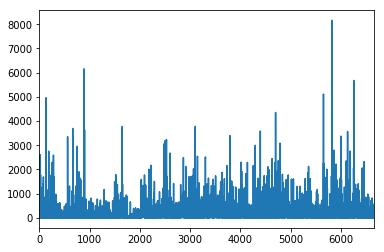

In [10]:
import matplotlib.pyplot as plt
dataset.review_count.plot()
plt.show()

In [11]:
yelp_branches = [
    'kimos-maui-lahaina',
    'sunnyside-tahoe-city-2',
    'dukes-huntington-beach-huntington-beach-2',
    'dukes-la-jolla-la-jolla',
    'dukes-malibu-malibu-2',
    'dukes-beach-house-lahaina',
    'dukes-kauai-lihue-3',
    'dukes-waikiki-honolulu-2',
    'hula-grill-waikiki-honolulu-3',
    'hula-grill-kaanapali-lahaina-2',
    'keokis-paradise-koloa',
    'leilanis-lahaina-2'
]
[i for i in dataset.alias.values if i in yelp_branches]

['kimos-maui-lahaina',
 'leilanis-lahaina-2',
 'hula-grill-kaanapali-lahaina-2',
 'dukes-beach-house-lahaina',
 'sunnyside-tahoe-city-2',
 'dukes-huntington-beach-huntington-beach-2',
 'dukes-la-jolla-la-jolla',
 'dukes-malibu-malibu-2',
 'dukes-kauai-lihue-3',
 'keokis-paradise-koloa',
 'dukes-waikiki-honolulu-2',
 'hula-grill-waikiki-honolulu-3']

In [123]:
dataset.is_closed[dataset.is_closed == True].count()

0

In [194]:
dataset.price.value_counts()

$$      2516
$       1952
$$$      312
$$$$      70
Name: price, dtype: int64

In [127]:
print(f"sum : {dataset.review_count.sum()}")
print(f"mean: {dataset.review_count.mean()}")

sum : 1416734
mean: 212.5951380552221


In [199]:
print(f"sum : {dataset.rating.sum()}")
print(f"mean: {dataset.rating.mean()}")

sum : 25611.5
mean: 3.8432623049219687


In [171]:
dataset.loc[dataset.alias.isin(yelp_branches)].price.value_counts()

$$    12
Name: price, dtype: int64

In [126]:
print(dataset.loc[dataset.alias.isin(yelp_branches)].review_count.sum())
print(dataset.loc[dataset.alias.isin(yelp_branches)].review_count.mean())

26365
2197.0833333333335


In [212]:
print(dataset.loc[dataset.alias.isin(yelp_branches)].rating.sum())
print(dataset.loc[dataset.alias.isin(yelp_branches)].rating.mean())

47.5
3.9583333333333335


In [181]:
import math


def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [186]:
origin = dataset.iloc[0].coordinate_latitude, dataset.iloc[0].coordinate_longitude
destination = dataset.iloc[4].coordinate_latitude, dataset.iloc[4].coordinate_longitude
distance(origin, destination) * 1000

49.41870324385432

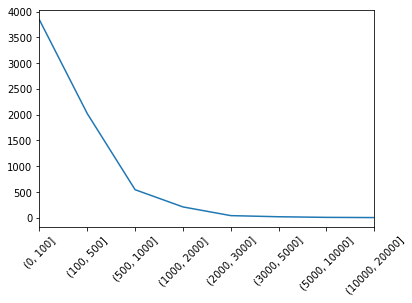

In [220]:
bins = [0, 100, 500, 1000, 2000, 3000, 5000, 10000, 20000]
lbls = [1, 2, 3, 4, 5, 6, 7, 8, 9]
pd_bins = pd.cut(dataset.review_count, bins, lbls).value_counts()
pd_bins.plot().tick_params(axis='x', labelrotation=45)

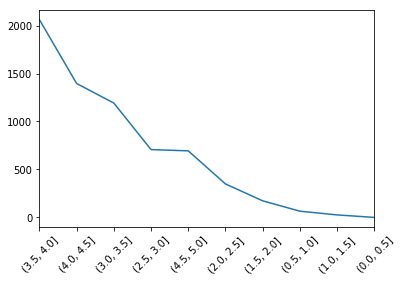

In [231]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
pd_bins = pd.cut(dataset.rating, bins).value_counts()
pd_bins.plot().tick_params(axis='x', labelrotation=45)

In [232]:
pd_bins

(3.5, 4.0]    2061
(4.0, 4.5]    1396
(3.0, 3.5]    1192
(2.5, 3.0]     707
(4.5, 5.0]     694
(2.0, 2.5]     349
(1.5, 2.0]     173
(0.5, 1.0]      65
(1.0, 1.5]      26
(0.0, 0.5]       0
Name: rating, dtype: int64